In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_path = 'D:/workspace/MachineLearning/machine-learning-practice/Datasets/titanic_train.csv'
data = pd.read_csv(dataset_path)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## The Data

### Step-1: Missing Data

In [4]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


###  Visualizing Missing Data Columns

<Axes: >

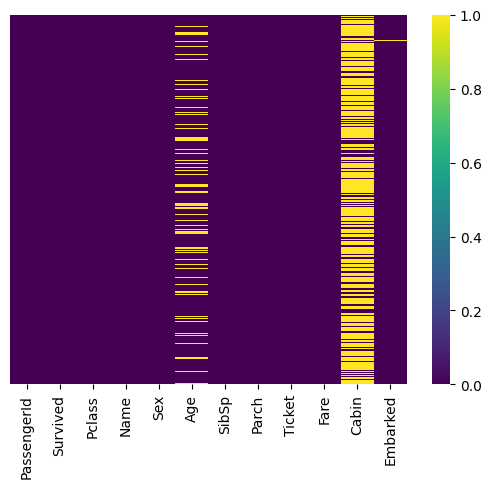

In [5]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

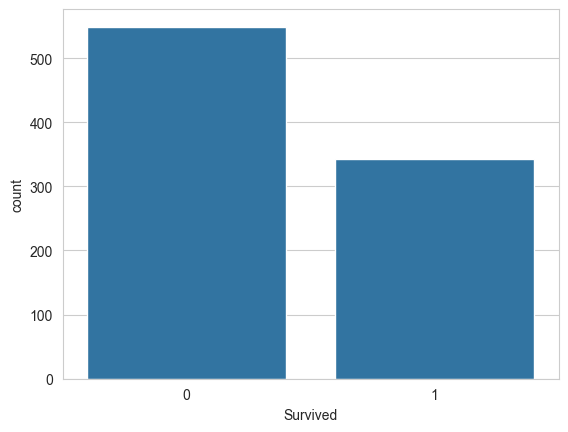

In [6]:
sns.set_style('whitegrid')
sns.countplot(data=data, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

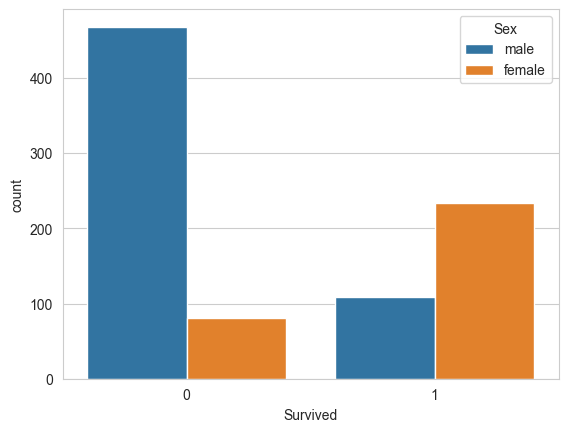

In [7]:
sns.countplot(data=data, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

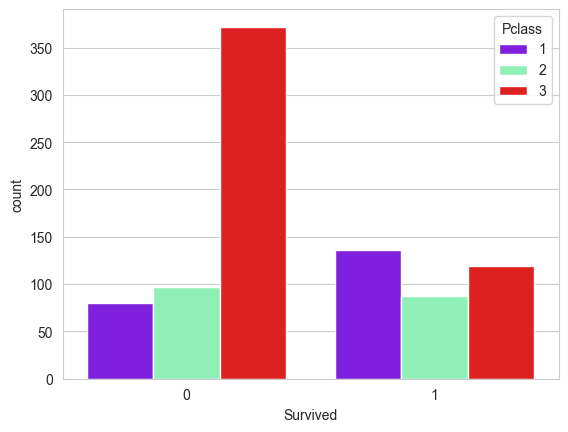

In [8]:
sns.countplot(data=data, x='Survived', hue='Pclass', palette='rainbow')

### Try to see the distribution of Age

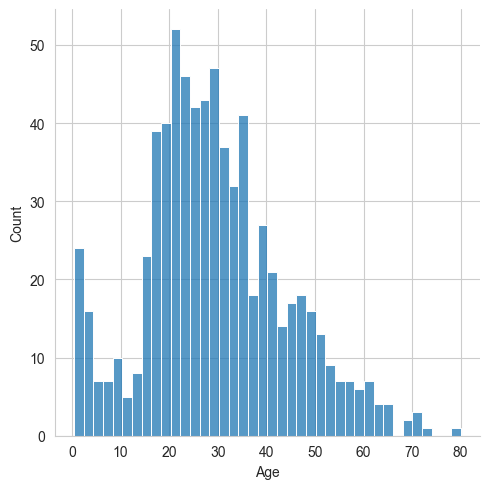

In [9]:
sns.displot(data=data['Age'].dropna(), bins=40)

<Axes: >

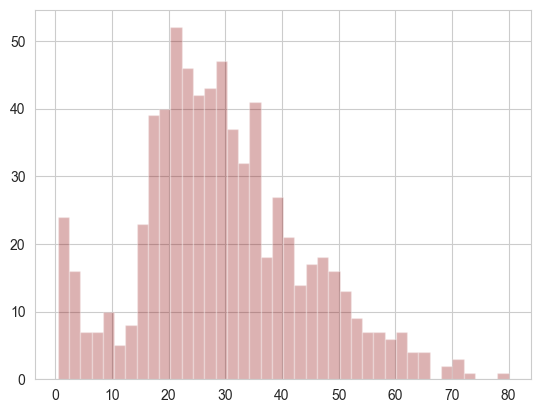

In [10]:
data['Age'].hist(bins=40, alpha=0.3, color='darkred')

## count of sibling and spouse

<Axes: xlabel='SibSp', ylabel='count'>

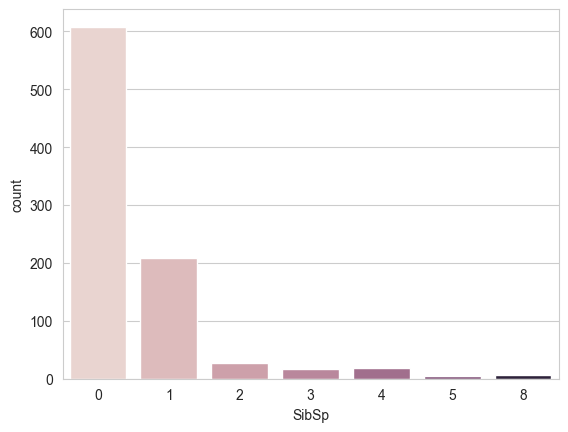

In [11]:
sns.countplot(data=data, x='SibSp', hue='SibSp', legend=False)

## Fares Histogram

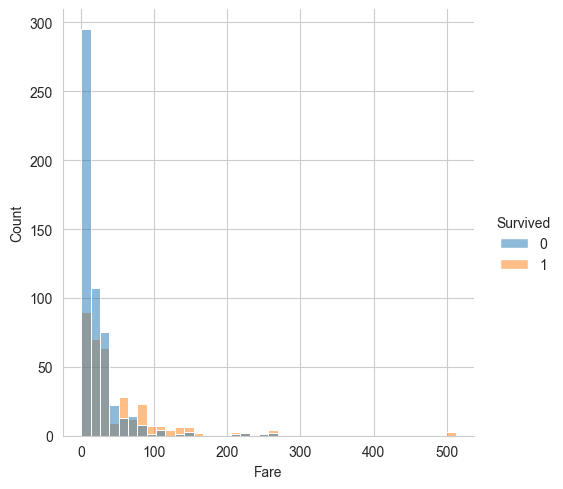

In [12]:
sns.displot(data=data, x='Fare', bins=40, hue='Survived')

## Data Cleaning

We can observe that 20% of ages is only missing, so what we could do is replace the NaN values in age with the mean of their respective passenger class

<Axes: xlabel='Pclass', ylabel='Age'>

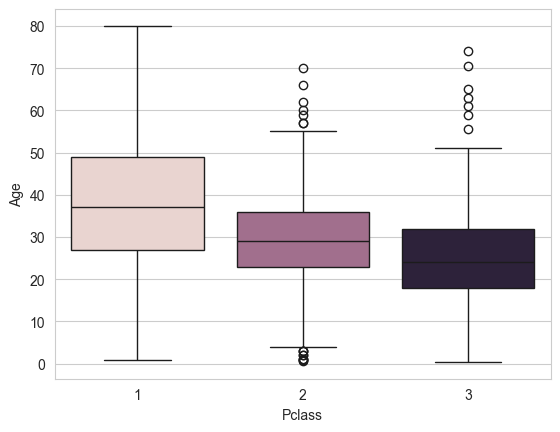

In [13]:
sns.boxplot(data, x='Pclass', y='Age', hue='Pclass', legend=False)

In [14]:
avg_ages_per_pclass = dict(data.groupby('Pclass')['Age'].mean())

avg_ages_per_pclass = {key: int(val) for key, val in avg_ages_per_pclass.items()}
avg_ages_per_pclass

{1: 38, 2: 29, 3: 25}

In [15]:
def compute_age(col):
    Age = col.iloc[0]
    Pclass = col.iloc[1]

    if pd.isnull(Age):
        return avg_ages_per_pclass[Pclass]

    return Age

In [16]:
data['Age'] = data[['Age', 'Pclass']].apply(compute_age, axis=1)

<Axes: >

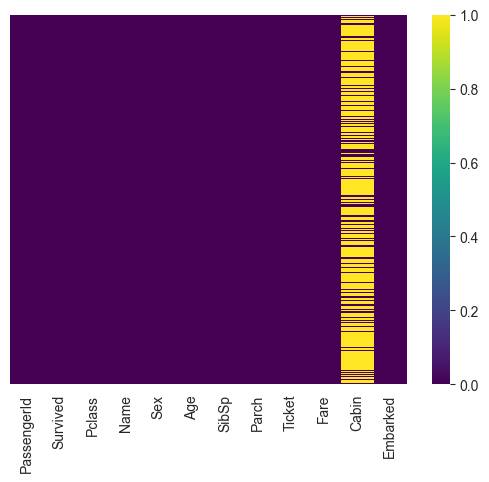

In [17]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

we can see that all the empty Ages have been filled with their respective avg

In [18]:
data.drop('Cabin', axis=1, inplace=True)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Converting Categorical Features

In [20]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
sex = pd.get_dummies(data['Sex'], drop_first=True, dtype=int).head()
sex

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embarked = pd.get_dummies(data['Embarked'], drop_first=True, dtype=int).head()
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [26]:
data = pd.concat([data, sex, embarked], axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


## Dependent and Independent Features

Dependent: Survived<br>
Independent: all other remaining columns

# Building a Logistic Regression Model based on this data

### Train Test Split

In [39]:
X = data.drop('Survived', axis=1)

In [40]:
Y = data['Survived']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)